<a href="https://colab.research.google.com/github/RayenBoukhchina/RayenBoukhchina/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')


# New Section

In [ ]:
data=pd.read_csv('diabetes.csv')

### **Explore Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
duplicates=data.duplicated().sum()
print(duplicates)

0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#**Analysis**

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


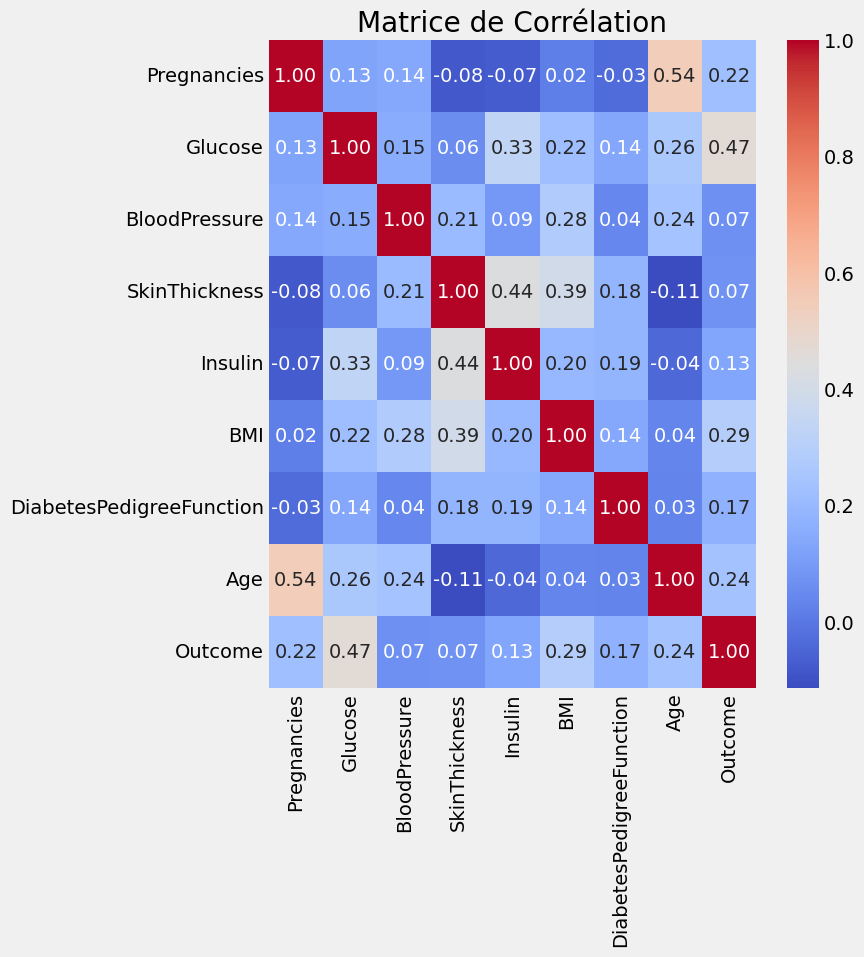

In [ ]:
plt.figure(figsize=(7, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

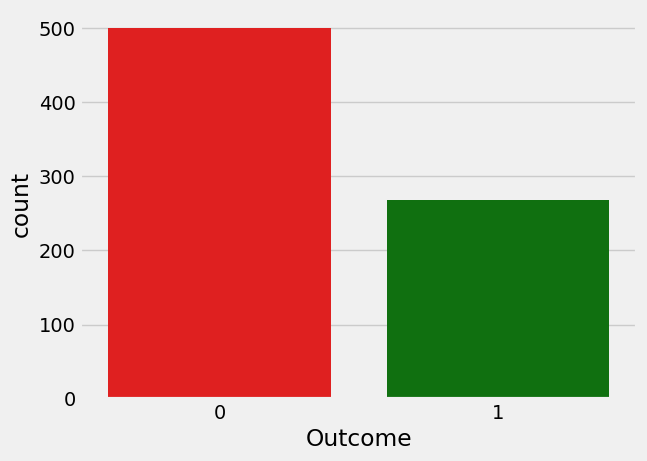

In [ ]:
sns.countplot(x='Outcome', data=data , palette=['r','g'])
plt.show()

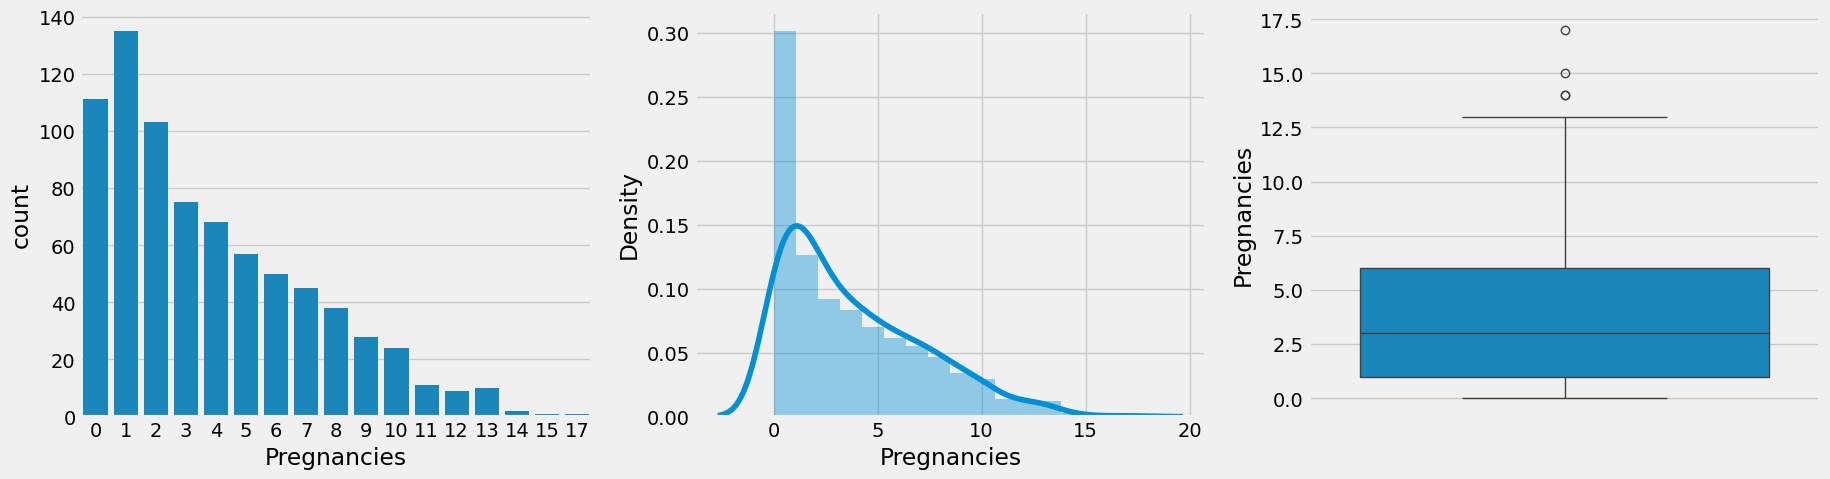

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x='Pregnancies',data=data)
plt.subplot(1,3,2)
sns.distplot(data['Pregnancies'])
plt.subplot(1,3,3)
sns.boxplot(y=data['Pregnancies'])
plt.show()

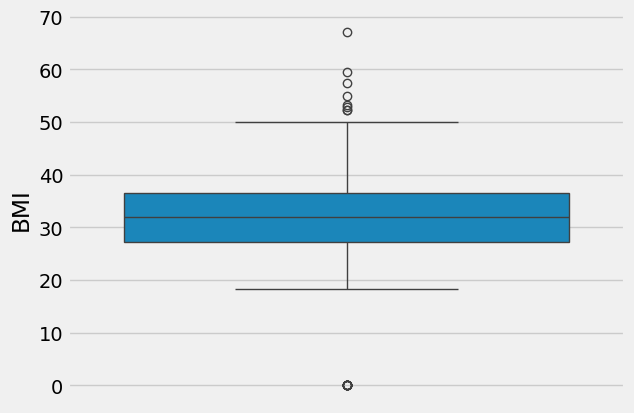

In [ ]:
sns.boxplot(y=data['BMI'])
plt.show()

# **Create model**

In [ ]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rm=RandomOverSampler(random_state=42)
x_res,y_res=rm.fit_resample(x,y)

In [ ]:
from collections import Counter

In [ ]:
print('Old data set shape{}'.format(Counter(y)))
print('Old data set shape{}'.format(Counter(y_res)))

Old data set shapeCounter({0: 500, 1: 268})
Old data set shapeCounter({1: 500, 0: 500})


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
result1=[]
result2=[]
result3=[]
result4=[]
result5=[]
result6=[]

In [ ]:
def use(model):
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.show()

    print(classification_report(y_test, y_pred))

    print(model)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1-score:', f1_score(y_test, y_pred))
    result1.append(accuracy_score(y_test, y_pred))
    result2.append(recall_score(y_test, y_pred))
    result3.append(f1_score(y_test, y_pred))
    y_probs = model.predict_proba(x_test)[:, 1]
    y_pred_adjusted = (y_probs > 0.3).astype(int)
    new_recall = recall_score(y_test, y_pred_adjusted)
    new_accuarcy = accuracy_score(y_test, y_pred_adjusted)
    print(f"New Recall: {new_recall:.2f}")
    print(f"New Accuracy: {new_accuarcy:.2f}")
    f1 = f1_score(y_test, y_pred_adjusted)
    print(f"New F1-score: {f1:.2f}")
    result4.append(accuracy_score(y_test, y_pred_adjusted))
    result5.append(recall_score(y_test, y_pred_adjusted))
    result6.append(f1_score(y_test, y_pred_adjusted))


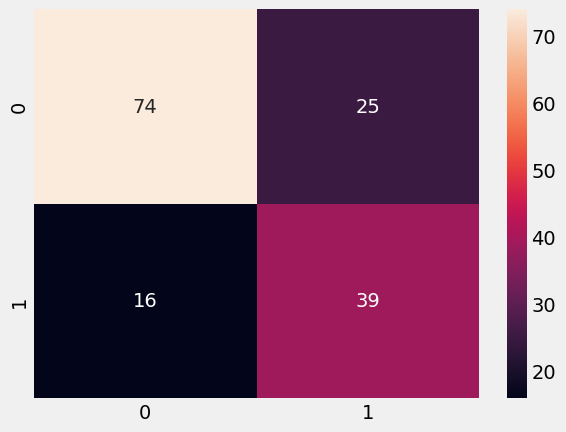

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

GradientBoostingClassifier(n_estimators=1000)
Accuracy: 0.7337662337662337
Recall: 0.7090909090909091
F1-score: 0.6554621848739496
New Recall: 0.75
New Accuracy: 0.71
New F1-score: 0.65


In [ ]:

use(GradientBoostingClassifier(n_estimators=1000))


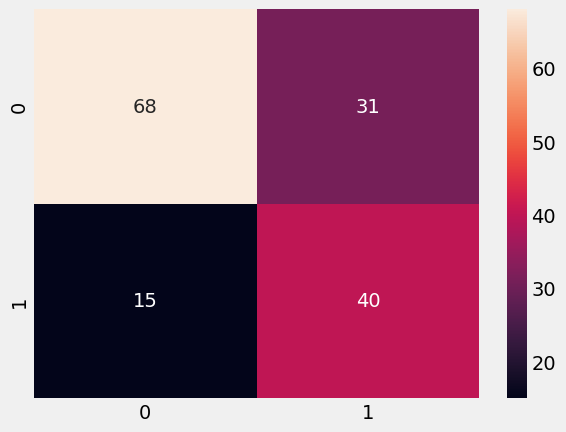

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        99
           1       0.56      0.73      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.73      0.70      0.71       154

LogisticRegression(class_weight='balanced')
Accuracy: 0.7012987012987013
Recall: 0.7272727272727273
F1-score: 0.6349206349206349
New Recall: 0.91
New Accuracy: 0.64
New F1-score: 0.64


In [ ]:

use(LogisticRegression(class_weight='balanced'))


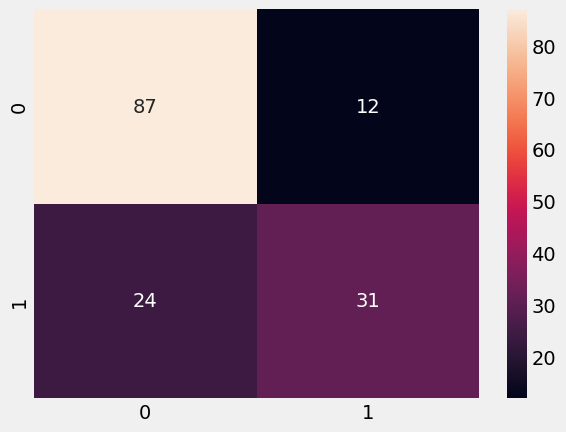

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

SVC(probability=True)
Accuracy: 0.7662337662337663
Recall: 0.5636363636363636
F1-score: 0.6326530612244898
New Recall: 0.76
New Accuracy: 0.69
New F1-score: 0.64


In [ ]:

use(SVC(probability=True))


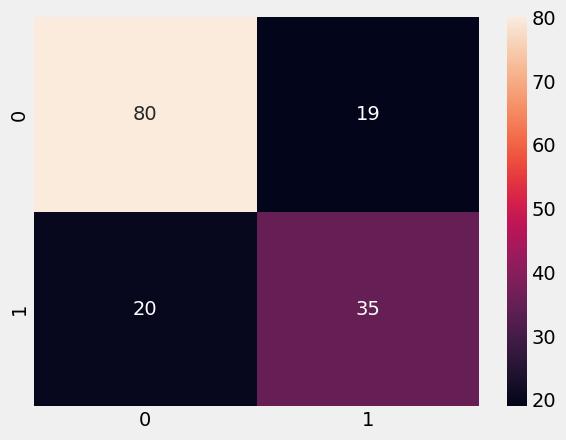

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

RandomForestClassifier(class_weight='balanced', n_estimators=1000)
Accuracy: 0.7467532467532467
Recall: 0.6363636363636364
F1-score: 0.6422018348623854
New Recall: 0.82
New Accuracy: 0.69
New F1-score: 0.65


In [ ]:

use(RandomForestClassifier(n_estimators=1000,class_weight='balanced'))

In [ ]:
models=['GradientBoostingClassifier','LogisticRegression','SVC','RandomForestClassifier']
print('avant le maximisation du recall')
r=pd.DataFrame({ 'Algorismis':models, 'Accuarcies':result1, 'Recals':result2, 'F1-score':result3})
r

avant le maximisation du recall


,Algorismis,Accuarcies,Recals,F1-score
0,GradientBoostingClassifier,0.733766,0.709091,0.655462
1,LogisticRegression,0.701299,0.727273,0.634921
2,SVC,0.766234,0.563636,0.632653
3,RandomForestClassifier,0.746753,0.636364,0.642202


In [ ]:
print('apres le maximisation du recall')
final_result=pd.DataFrame({ 'Algorismis':models, 'Accuarcies':result4, 'Recals':result5, 'F1-score':result6})
final_result

apres le maximisation du recall


,Algorismis,Accuarcies,Recals,F1-score
0,GradientBoostingClassifier,0.714286,0.745455,0.650794
1,LogisticRegression,0.636364,0.909091,0.641026
2,SVC,0.688312,0.763636,0.636364
3,RandomForestClassifier,0.688312,0.818182,0.652174


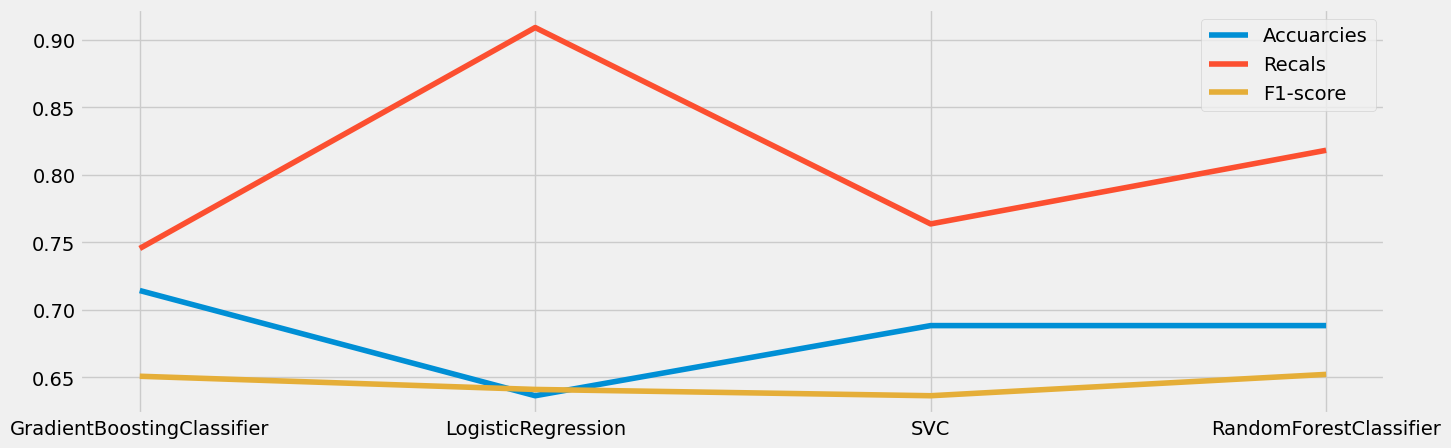

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(final_result['Algorismis'],final_result['Accuarcies'],label='Accuarcies')
plt.plot(final_result['Algorismis'],final_result['Recals'],label='Recals')
plt.plot(final_result['Algorismis'],final_result['F1-score'],label='F1-score')
plt.legend()
plt.show()
